## Fetching last 1 year of Kolkata weather data from Open-Meteo and saving the dataset as Rainfall.csv

In [1]:
import requests
import pandas as pd
from datetime import date, timedelta

# For Kolkata
latitude, longitude = 22.57, 88.36
end_date = date.today()
start_date = end_date - timedelta(days=365)

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": start_date.strftime("%Y-%m-%d"),
    "end_date": end_date.strftime("%Y-%m-%d"),
    "daily": [
        "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean",
        "precipitation_sum", "windspeed_10m_max", "winddirection_10m_dominant",
        "relative_humidity_2m_mean", "cloudcover_mean", "sunshine_duration"
    ],
    "timezone": "auto"
}
res = requests.get(url, params=params).json()
df = pd.DataFrame(res["daily"])

# Mapping to schema
mapped_df = pd.DataFrame({
    "day": range(1, len(df) + 1),
    "maxtemp": df["temperature_2m_max"],
    "temparature": df["temperature_2m_mean"],
    "mintemp": df["temperature_2m_min"],
    "humidity": df["relative_humidity_2m_mean"],
    "cloud": df["cloudcover_mean"],
    "rainfall": df["precipitation_sum"].apply(lambda x: "yes" if x > 2.5 else "no"),
    "sunshine": df["sunshine_duration"].div(3600),  # convert seconds → hours
    "winddirection": df["winddirection_10m_dominant"],
    "windspeed": df["windspeed_10m_max"]
})

# Save final dataset
save_path = "Rainfall.csv"
mapped_df.to_csv(save_path, index=False)

mapped_df.head(), mapped_df.tail(), mapped_df.shape

(   day  maxtemp  temparature  mintemp  humidity  cloud rainfall   sunshine  \
 0    1     30.9         27.9     26.3      87.0   98.0      yes   7.990333   
 1    2     32.1         28.1     25.6      87.0   84.0      yes   8.808033   
 2    3     32.0         27.8     25.8      89.0   98.0      yes  10.042089   
 3    4     31.9         28.0     25.5      87.0   90.0      yes   8.227261   
 4    5     32.1         28.5     25.7      84.0   97.0       no  10.976372   
 
    winddirection  windspeed  
 0          130.0       15.9  
 1          140.0       16.2  
 2          155.0       11.3  
 3          172.0       12.8  
 4          160.0       18.4  ,
      day  maxtemp  temparature  mintemp  humidity  cloud rainfall  sunshine  \
 361  362     31.1         27.9     25.7      85.0   89.0      yes  9.722733   
 362  363     30.2         27.4     25.7      88.0   99.0      yes  6.756664   
 363  364     30.2         27.5     25.7      89.0   98.0      yes  7.450086   
 364  365      Na

## Import dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
print('success')

success


## Load dataset

In [4]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,maxtemp,temparature,mintemp,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,30.9,27.9,26.3,87.0,98.0,yes,7.990333,130.0,15.9
1,2,32.1,28.1,25.6,87.0,84.0,yes,8.808033,140.0,16.2
2,3,32.0,27.8,25.8,89.0,98.0,yes,10.042089,155.0,11.3
3,4,31.9,28.0,25.5,87.0,90.0,yes,8.227261,172.0,12.8
4,5,32.1,28.5,25.7,84.0,97.0,no,10.976372,160.0,18.4


## Dataset shape

In [5]:
df.shape

(366, 10)

## Dataset info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   maxtemp        364 non-null    float64
 2   temparature    364 non-null    float64
 3   mintemp        364 non-null    float64
 4   humidity       364 non-null    float64
 5   cloud          364 non-null    float64
 6   rainfall       366 non-null    object 
 7   sunshine       364 non-null    float64
 8   winddirection  364 non-null    float64
 9   windspeed      364 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.7+ KB


## Summary statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,183.500000,105.799338,1.0,92.250000,183.500000,274.750000,366.000000
maxtemp,364.0,31.161264,3.743617,20.1,28.900000,31.250000,33.200000,42.100000
temparature,364.0,26.556868,3.610931,17.1,24.175000,27.500000,28.900000,34.300000
mintemp,364.0,22.853022,4.289614,12.0,19.675000,24.650000,26.025000,29.500000
humidity,364.0,76.236264,11.287342,40.0,68.000000,78.000000,86.000000,94.000000
cloud,364.0,52.153846,38.049967,0.0,15.000000,49.000000,95.000000,100.000000
sunshine,364.0,8.978551,2.780926,0.0,8.309298,9.939294,10.732317,12.012014
winddirection,364.0,189.986264,96.835963,0.0,132.500000,189.000000,251.000000,360.000000
windspeed,364.0,11.664286,4.105897,4.5,8.800000,10.850000,13.625000,31.600000


## Null values count

In [9]:
df.isnull().sum()

day              0
maxtemp          2
temparature      2
mintemp          2
humidity         2
cloud            2
rainfall         0
sunshine         2
winddirection    2
windspeed        2
dtype: int64

## Clean and check column names

In [13]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'maxtemp', 'temparature', 'mintemp', 'humidity', 'cloud',
       'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

## Fill missing values

In [14]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        val = df[col].mean()
        df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

## Rainfall distribution

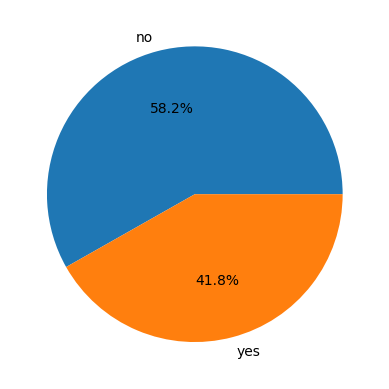

In [16]:
plt.pie(df['rainfall'].value_counts().values,
        labels=df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

## Class-wise averages

In [17]:
df.groupby('rainfall').mean()

,day,maxtemp,temparature,mintemp,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,
no,158.464789,30.868650,25.603351,21.031953,69.809730,30.569520,10.078920,205.394237,10.261636
yes,218.352941,31.568627,27.884314,25.388235,85.183007,82.202614,7.446667,168.535948,13.616993


## Select numerical features

In [18]:
features = list(df.select_dtypes(include=np.number).columns)
features.remove('day')  # 'day' is for readability, not ML
print(features)

['maxtemp', 'temparature', 'mintemp', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


## Distribution plots

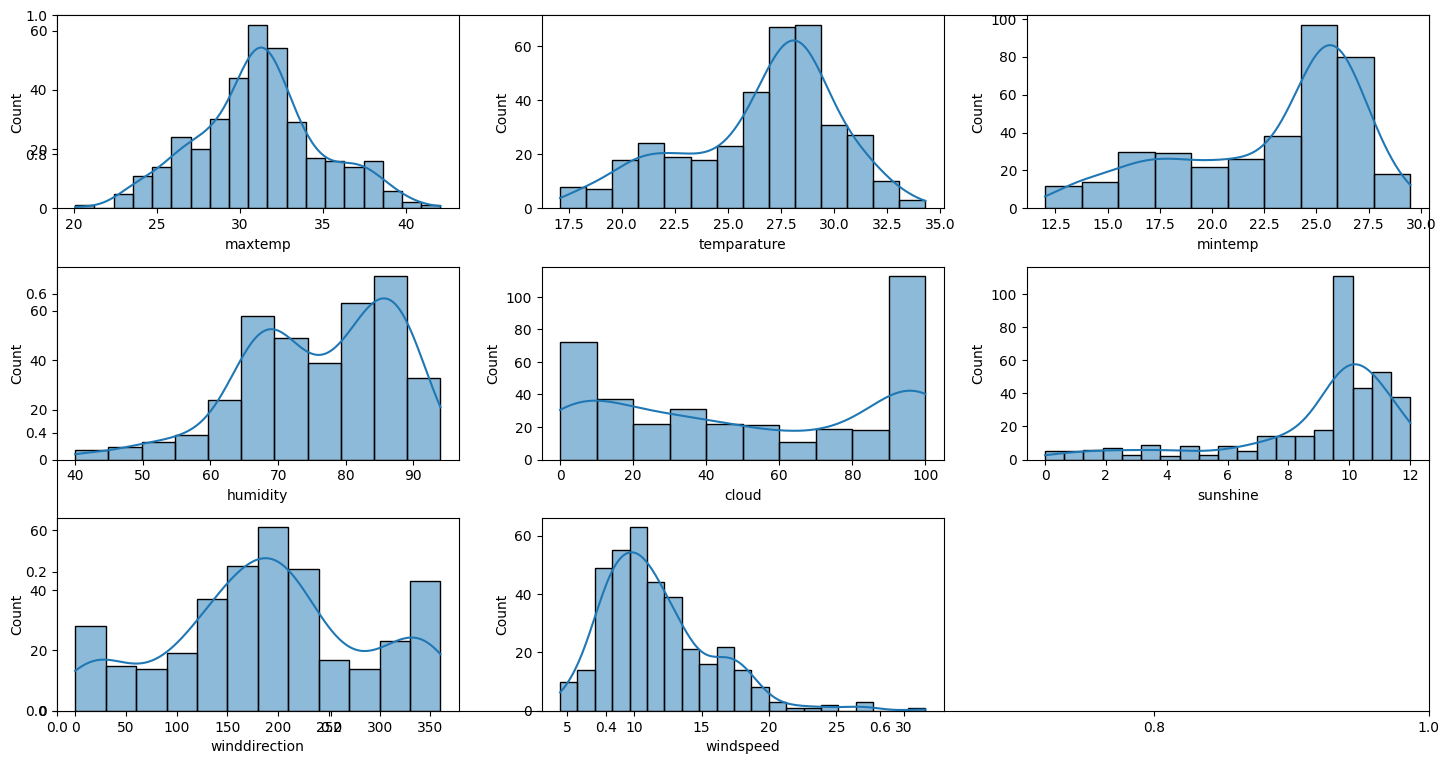

In [22]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(3,3, i + 1)
    sb.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

## Boxplots

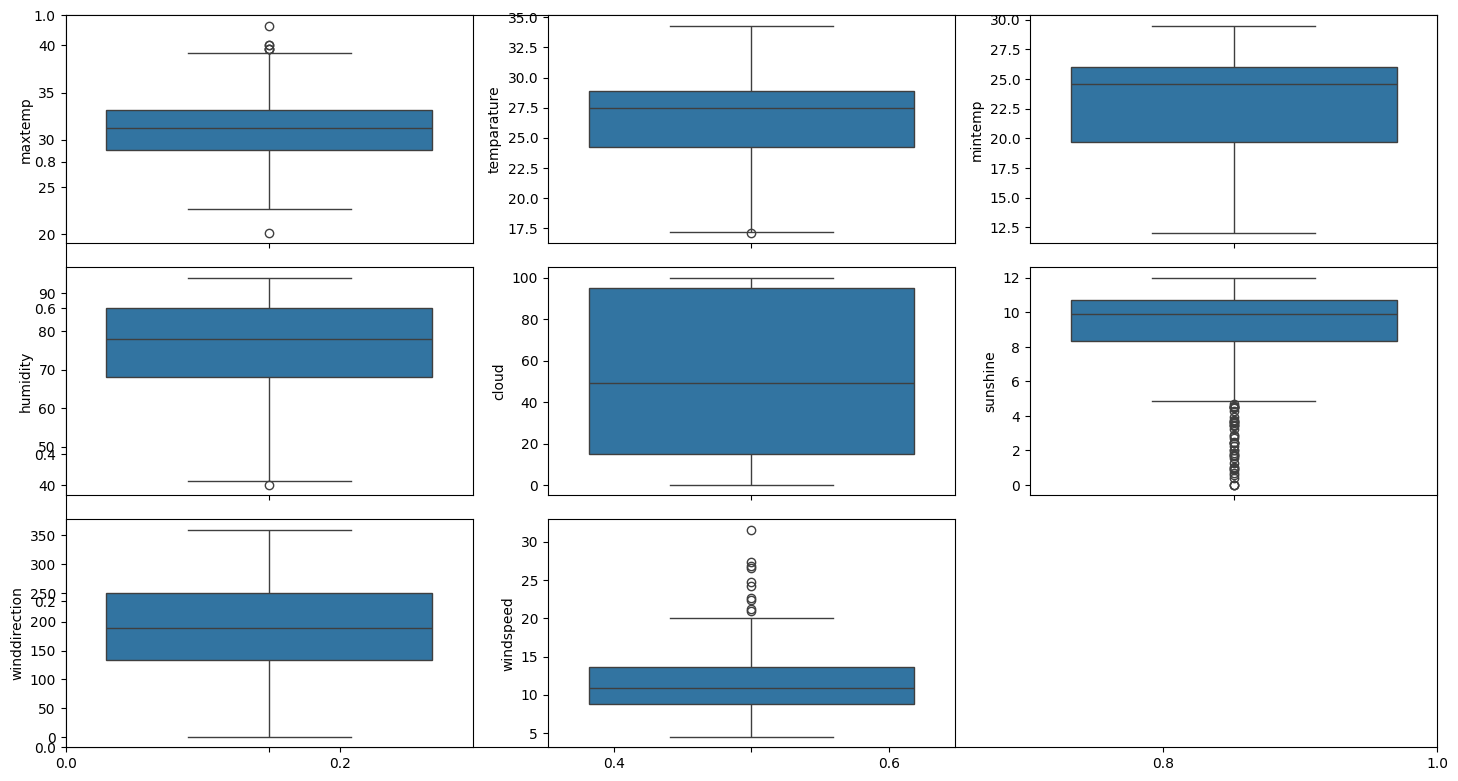

In [23]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(3,3, i + 1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

## Encode rainfall labels

In [24]:
df.replace({'yes':1, 'no':0}, inplace=True)

## Correlation heatmap

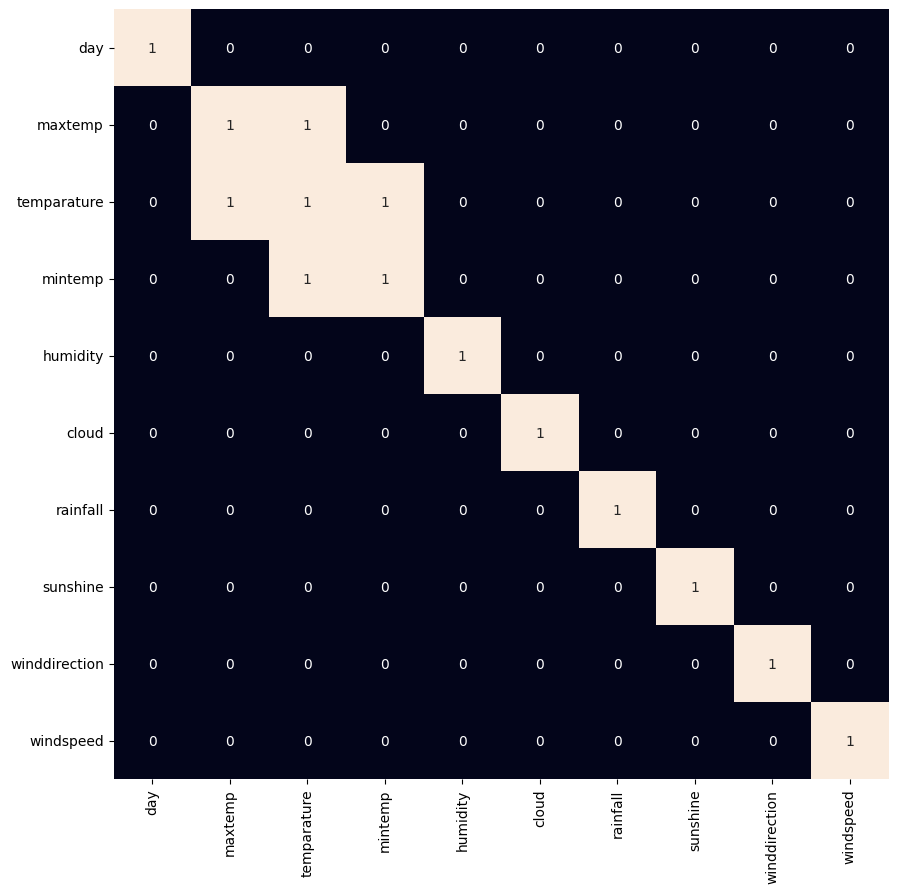

In [25]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

## Drop redundant features

In [26]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)